In [ ]:
%pip install emoji demoji google-colab

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import demoji
import string
import nltk
from nltk.corpus import stopwords
import spacy
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.linear_model import LogisticRegression

## Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/project_training.csv'

In [ ]:
data = pd.read_csv(base_dir)
data.sample(100)

,Index,Text,Sentiment
835,64,dont want integrate anything house doesnt soun...,Negative
1170,1484,fun buy if u never alexa experience,Positive
3001,175,poor recognition even if stay meter away not r...,Positive
1212,723,get sale great price wipro bulb product undoub...,Positive
904,630,especially work hindi connect smart devices li...,Positive
...,...,...,...
1171,1161,fun days but start get bore feel useless im re...,Negative
2676,3,not buy product ask alexa kashmir part country...,Neutral
143,2413,alexa opbut if want alexa buy black colouras c...,Negative
3729,142,use echo dot play music kid around become easi...,Positive


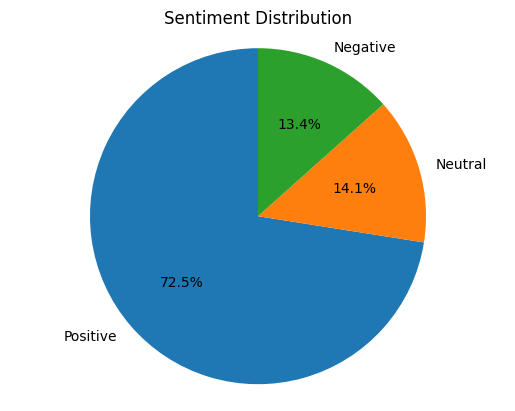

In [ ]:
sentiment_counts = data['Sentiment'].value_counts()

plt.pie(sentiment_counts, labels = sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')

plt.show()

## Text Preprocessing


In [ ]:
# Remove tags
# lowercase
# remove URLs
# remove punctuation
# convert emojis to text
# chat-word treatment
# remove stopwords
# Tokenization
# Lemmatizer

### Removing HTML tags

In [ ]:
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

data['Text'] = data['Text'].apply(remove_tags)
data

,Index,Text,Sentiment
0,3870,able play youtube alexa,Positive
1,62,able recognize indian accent really well drop ...,Positive
2,487,absolute smart device amazon connect external ...,Positive
3,3204,absolutely amaze new member family control hom...,Positive
4,1265,absolutely amaze previously sceptical invest m...,Positive
...,...,...,...
4370,7887,@EAMaddenNFL sooo long dreads don’t exist any...,Positive
4371,7966,They messed up everybody ratings in that game ...,Negative
4372,7981,@saquon you peep your ball carrier vision? The...,Neutral
4373,6923,Breaking News: An Eli Lilly antibody treatment...,Neutral


### Lowercase

In [ ]:
data['Text'] = data['Text'].apply(lambda x:x.lower())
data

,Index,Text,Sentiment
0,3870,able play youtube alexa,Positive
1,62,able recognize indian accent really well drop ...,Positive
2,487,absolute smart device amazon connect external ...,Positive
3,3204,absolutely amaze new member family control hom...,Positive
4,1265,absolutely amaze previously sceptical invest m...,Positive
...,...,...,...
4370,7887,@eamaddennfl sooo long dreads don’t exist any...,Positive
4371,7966,they messed up everybody ratings in that game ...,Negative
4372,7981,@saquon you peep your ball carrier vision? the...,Neutral
4373,6923,breaking news: an eli lilly antibody treatment...,Neutral


### Remove URLs

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

data['Text'] = data['Text'].apply(remove_url)
data

,Index,Text,Sentiment
0,3870,able play youtube alexa,Positive
1,62,able recognize indian accent really well drop ...,Positive
2,487,absolute smart device amazon connect external ...,Positive
3,3204,absolutely amaze new member family control hom...,Positive
4,1265,absolutely amaze previously sceptical invest m...,Positive
...,...,...,...
4370,7887,@eamaddennfl sooo long dreads don’t exist any...,Positive
4371,7966,they messed up everybody ratings in that game ...,Negative
4372,7981,@saquon you peep your ball carrier vision? the...,Neutral
4373,6923,breaking news: an eli lilly antibody treatment...,Neutral


### Remove Punctuation

In [ ]:
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['Text'] = data['Text'].apply(remove_punc)
data

,Index,Text,Sentiment
0,3870,able play youtube alexa,Positive
1,62,able recognize indian accent really well drop ...,Positive
2,487,absolute smart device amazon connect external ...,Positive
3,3204,absolutely amaze new member family control hom...,Positive
4,1265,absolutely amaze previously sceptical invest m...,Positive
...,...,...,...
4370,7887,eamaddennfl sooo long dreads don’t exist anym...,Positive
4371,7966,they messed up everybody ratings in that game ...,Negative
4372,7981,saquon you peep your ball carrier vision they ...,Neutral
4373,6923,breaking news an eli lilly antibody treatment ...,Neutral


### Emojis to text

In [ ]:
def convert_emojis_to_shortcodes(text):
    return emoji.demojize(text, delimiters=(" ", " "))

data['Text'] = data['Text'].apply(convert_emojis_to_shortcodes)
data

,Index,Text,Sentiment
0,3870,able play youtube alexa,Positive
1,62,able recognize indian accent really well drop ...,Positive
2,487,absolute smart device amazon connect external ...,Positive
3,3204,absolutely amaze new member family control hom...,Positive
4,1265,absolutely amaze previously sceptical invest m...,Positive
...,...,...,...
4370,7887,eamaddennfl sooo long dreads don’t exist anym...,Positive
4371,7966,they messed up everybody ratings in that game ...,Negative
4372,7981,saquon you peep your ball carrier vision they ...,Neutral
4373,6923,breaking news an eli lilly antibody treatment ...,Neutral


### Removing underscores from emoji texts

In [ ]:
def replace_underscores(text):
  return text.replace('_', ' ')

data['Text'] = data['Text'].apply(replace_underscores)
data

,Index,Text,Sentiment
0,3870,able play youtube alexa,Positive
1,62,able recognize indian accent really well drop ...,Positive
2,487,absolute smart device amazon connect external ...,Positive
3,3204,absolutely amaze new member family control hom...,Positive
4,1265,absolutely amaze previously sceptical invest m...,Positive
...,...,...,...
4370,7887,eamaddennfl sooo long dreads don’t exist anym...,Positive
4371,7966,they messed up everybody ratings in that game ...,Negative
4372,7981,saquon you peep your ball carrier vision they ...,Neutral
4373,6923,breaking news an eli lilly antibody treatment ...,Neutral


### Chat-Word treatment

In [ ]:
chat_words = {
    "afaik": "as far as i know",
    "afk": "away from keyboard",
    "asap": "as soon as possible",
    "atk": "at the keyboard",
    "atm": "at the moment",
    "a3": "anytime, anywhere, anyplace",
    "bak": "back at keyboard",
    "bbl": "be back later",
    "bbs": "be back soon",
    "bfn": "bye for now",
    "b4n": "bye for now",
    "brb": "be right back",
    "brt": "be right there",
    "btw": "by the way",
    "b4": "before",
    "cu": "see you",
    "cul8r": "see you later",
    "cya": "see you",
    "faq": "frequently asked questions",
    "fc": "fingers crossed",
    "fwiw": "for what it's worth",
    "fyi": "for your information",
    "gal": "get a life",
    "gg": "good game",
    "gn": "good night",
    "gmta": "great minds think alike",
    "gr8": "great!",
    "g9": "genius",
    "ic": "i see",
    "icq": "i seek you (also a chat program)",
    "ilu": "ilu: i love you",
    "imho": "in my honest/humble opinion",
    "imo": "in my opinion",
    "iow": "in other words",
    "irl": "in real life",
    "kiss": "keep it simple, stupid",
    "ldr": "long distance relationship",
    "lmao": "laughing my a** off",
    "lol": "laughing out loud",
    "ltns": "long time no see",
    "l8r": "later",
    "mte": "my thoughts exactly",
    "m8": "mate",
    "nrn": "no reply necessary",
    "oic": "oh i see",
    "pita": "pain in the a..",
    "prt": "party",
    "prw": "parents are watching",
    "qpsa": "que pasa?",
    "rofl": "rolling on the floor laughing",
    "roflol": "rolling on the floor laughing out loud",
    "rotflmao": "rolling on the floor laughing my a.. off",
    "sk8": "skate",
    "stats": "your sex and age",
    "asl": "age, sex, location",
    "thx": "thank you",
    "ttfn": "ta-ta for now!",
    "ttyl": "talk to you later",
    "u": "you",
    "u2": "you too",
    "u4e": "yours for ever",
    "wb": "welcome back",
    "wtf": "what the f...",
    "wtg": "way to go!",
    "wuf": "where are you from?",
    "w8": "wait...",
    "7k": "sick:-d laugher",
    "tfw": "that feeling when",
    "mfw": "my face when",
    "mrw": "my reaction when",
    "ifyp": "i feel your pain",
    "tntl": "trying not to laugh",
    "jk": "just kidding",
    "idc": "i don’t care",
    "ily": "i love you",
    "imu": "i miss you",
    "adih": "another day in hell",
    "zzz": "sleeping, bored, tired",
    "wywh": "wish you were here",
    "time": "tears in my eyes",
    "bae": "before anyone else",
    "fimh": "forever in my heart",
    "bsaaw": "big smile and a wink",
    "bwl": "bursting with laughter",
    "bff": "best friends forever",
    "csl": "can’t stop laughing",
}

In [ ]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w in chat_words:
            new_text.append(chat_words[w])
        else:
            new_text.append(w)
    return " ".join(new_text)

data['Text'] = data['Text'].apply(chat_conversion)
data

,Index,Text,Sentiment
0,3870,able play youtube alexa,Positive
1,62,able recognize indian accent really well drop ...,Positive
2,487,absolute smart device amazon connect external ...,Positive
3,3204,absolutely amaze new member family control hom...,Positive
4,1265,absolutely amaze previously sceptical invest m...,Positive
...,...,...,...
4370,7887,eamaddennfl sooo long dreads don’t exist anymo...,Positive
4371,7966,they messed up everybody ratings in that game ...,Negative
4372,7981,saquon you peep your ball carrier vision they ...,Neutral
4373,6923,breaking news an eli lilly antibody treatment ...,Neutral


### Remove Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sw_list = stopwords.words('english')

In [ ]:
data['Text'] = data['Text'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))
data

,Index,Text,Sentiment
0,3870,able play youtube alexa,Positive
1,62,able recognize indian accent really well drop ...,Positive
2,487,absolute smart device amazon connect external ...,Positive
3,3204,absolutely amaze new member family control hom...,Positive
4,1265,absolutely amaze previously sceptical invest m...,Positive
...,...,...,...
4370,7887,eamaddennfl sooo long dreads don’t exist anymo...,Positive
4371,7966,messed everybody ratings game cuh person facep...,Negative
4372,7981,saquon peep ball carrier vision violated perso...,Neutral
4373,6923,breaking news eli lilly antibody treatment cli...,Neutral


### Tokenization

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

# Apply the tokenization function to the text column
data['Text'] = data['Text'].apply(tokenize_text)
data

,Index,Text,Sentiment
0,3870,"[able, play, youtube, alexa]",Positive
1,62,"[able, recognize, indian, accent, really, well...",Positive
2,487,"[absolute, smart, device, amazon, connect, ext...",Positive
3,3204,"[absolutely, amaze, new, member, family, contr...",Positive
4,1265,"[absolutely, amaze, previously, sceptical, inv...",Positive
...,...,...,...
4370,7887,"[eamaddennfl, sooo, long, dreads, do, n’t, exi...",Positive
4371,7966,"[messed, everybody, ratings, game, cuh, person...",Negative
4372,7981,"[saquon, peep, ball, carrier, vision, violated...",Neutral
4373,6923,"[breaking, news, eli, lilly, antibody, treatme...",Neutral


### Stemming

In [ ]:
stemmer = PorterStemmer()

In [ ]:
def stem_tokens(tok):
    stemmed_tokens = [stemmer.stem(t) for t in tok]
    return " ".join(stemmed_tokens)

# Apply the stemming function to the 'tokens' column
data['Text'] = data['Text'].apply(stem_tokens)
data

,Index,Text,Sentiment
0,3870,abl play youtub alexa,Positive
1,62,abl recogn indian accent realli well drop func...,Positive
2,487,absolut smart devic amazon connect extern sub ...,Positive
3,3204,absolut amaz new member famili control home vo...,Positive
4,1265,absolut amaz previous sceptic invest money arr...,Positive
...,...,...,...
4370,7887,eamaddennfl sooo long dread do n’t exist anymo...,Positive
4371,7966,mess everybodi rate game cuh person facepalm ‍,Negative
4372,7981,saquon peep ball carrier vision violat person ...,Neutral
4373,6923,break news eli lilli antibodi treatment clinic...,Neutral


## Train Test Split

In [ ]:
data

,Index,Text,Sentiment
0,3870,abl play youtub alexa,Positive
1,62,abl recogn indian accent realli well drop func...,Positive
2,487,absolut smart devic amazon connect extern sub ...,Positive
3,3204,absolut amaz new member famili control home vo...,Positive
4,1265,absolut amaz previous sceptic invest money arr...,Positive
...,...,...,...
4370,7887,eamaddennfl sooo long dread do n’t exist anymo...,Positive
4371,7966,mess everybodi rate game cuh person facepalm ‍,Negative
4372,7981,saquon peep ball carrier vision violat person ...,Neutral
4373,6923,break news eli lilli antibodi treatment clinic...,Neutral


In [ ]:
x = data['Text']
x

0                                   abl play youtub alexa
1       abl recogn indian accent realli well drop func...
2       absolut smart devic amazon connect extern sub ...
3       absolut amaz new member famili control home vo...
4       absolut amaz previous sceptic invest money arr...
                              ...                        
4370    eamaddennfl sooo long dread do n’t exist anymo...
4371       mess everybodi rate game cuh person facepalm ‍
4372    saquon peep ball carrier vision violat person ...
4373    break news eli lilli antibodi treatment clinic...
4374    told y’ all plot johnson johnson get good roll...
Name: Text, Length: 4375, dtype: object

In [ ]:
y = data['Sentiment']
y

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
4370    Positive
4371    Negative
4372     Neutral
4373     Neutral
4374    Negative
Name: Sentiment, Length: 4375, dtype: object

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
y

array([2, 2, 2, ..., 1, 1, 0])

In [ ]:
# Positive -> 2
# Negative -> 0
# Neutral -> 1

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
x_test.shape[0] + x_train.shape[0]

4375

In [ ]:
x_train

1929                                             home use
3422    sound clearful volum sound vibrat alotnot satisfi
1195    get great indian festiv offer think valu price...
1692                                         good product
4112    check epic build made designsbyifr need lot sp...
                              ...                        
2895    order due support hindi languag option select ...
2763    respond sometim ca nt two action wait till fir...
905                               even gener softwar good
3980    work fine till last month product break connec...
235                  amaz product amazon good person hous
Name: Text, Length: 3500, dtype: object

## Text Vectorization and Model Building

### Bag of Words (BoW)

In [ ]:
cv = CountVectorizer(max_features = 3000)
x_train_bow = cv.fit_transform(x_train).toarray()
x_test_bow = cv.transform(x_test).toarray()

In [ ]:
x_train_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Using RandomForest

rf = RandomForestClassifier()

rf.fit(x_train_bow, y_train)
y_pred = rf.predict(x_test_bow)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision Score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8262857142857143
Precision: 0.8231038368267969
F1 Score: 0.8188208852372117
Confusion Matrix:
[[ 57  19  46]
 [  7 102  36]
 [ 10  34 564]]


In [ ]:
# Using SVM classifier

svm_classifier = svm.SVC()
svm_classifier.fit(x_train_bow, y_train)
y_pred = svm_classifier.predict(x_test_bow)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision Score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7954285714285714
Precision: 0.7940932359565899
F1 Score: 0.7655693452678611
Confusion Matrix:
[[ 34  12  76]
 [  2  70  73]
 [  6  10 592]]


In [ ]:
# Using Logistic Regression

logreg_classifier = LogisticRegression()
logreg_classifier.fit(x_train_bow, y_train)
y_pred = logreg_classifier.predict(x_test_bow)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision Score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.832
Precision: 0.8241629910917989
F1 Score: 0.8245388681890569
Confusion Matrix:
[[ 58  22  42]
 [  7 102  36]
 [ 18  22 568]]


### TF-IDF

In [ ]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train).toarray()
x_test_tfidf = tfidf.transform(x_test).toarray()

In [ ]:
# Using RandomForest

rf1 = RandomForestClassifier()

rf1.fit(x_train_tfidf, y_train)
y_pred = rf1.predict(x_test_tfidf)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision Score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8217142857142857
Precision: 0.8148604096008994
F1 Score: 0.8053837569139525
Confusion Matrix:
[[ 47  20  55]
 [  7  88  50]
 [  5  19 584]]


In [ ]:
# Using SVM classifier

svm_classifier1 = svm.SVC()
svm_classifier1.fit(x_train_tfidf, y_train)
y_pred = svm_classifier1.predict(x_test_tfidf)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision Score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7931428571428571
Precision: 0.8004527153234176
F1 Score: 0.7602960584983058
Confusion Matrix:
[[ 44   5  73]
 [  6  51  88]
 [  6   3 599]]


In [ ]:
# Using Logistic Regression

logreg_classifier1 = LogisticRegression()
logreg_classifier1.fit(x_train_tfidf, y_train)
y_pred = logreg_classifier1.predict(x_test_tfidf)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision Score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7851428571428571
Precision: 0.7767320795479142
F1 Score: 0.7536956785386938
Confusion Matrix:
[[ 48  10  64]
 [  7  47  91]
 [  8   8 592]]


# Observation Graphs

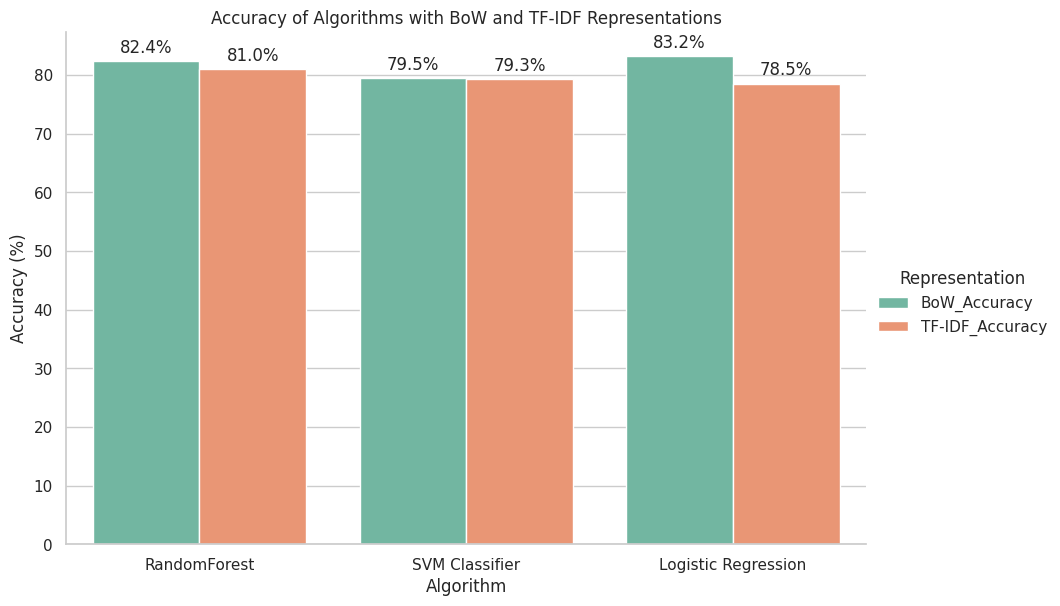

In [ ]:
# Creating a DataFrame with the accuracy data
acc = {
    'Algorithm': ['RandomForest', 'SVM Classifier', 'Logistic Regression'],
    'BoW_Accuracy': [82.4, 79.5, 83.2],
    'TF-IDF_Accuracy': [81.0, 79.3, 78.5]
}

df = pd.DataFrame(acc)

# Reshape the data for Seaborn
df_melted = df.melt('Algorithm', var_name='Representation', value_name='Accuracy')

# Plotting using Seaborn figure-level function (catplot)
sns.set(style="whitegrid")
g = sns.catplot(x='Algorithm', y='Accuracy', hue='Representation', data=df_melted, kind="bar", palette="Set2", height=6, aspect=1.5)

# Adding labels and title
g.set(title='Accuracy of Algorithms with BoW and TF-IDF Representations', ylabel='Accuracy (%)')

# Annotating each bar with respective percentages
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


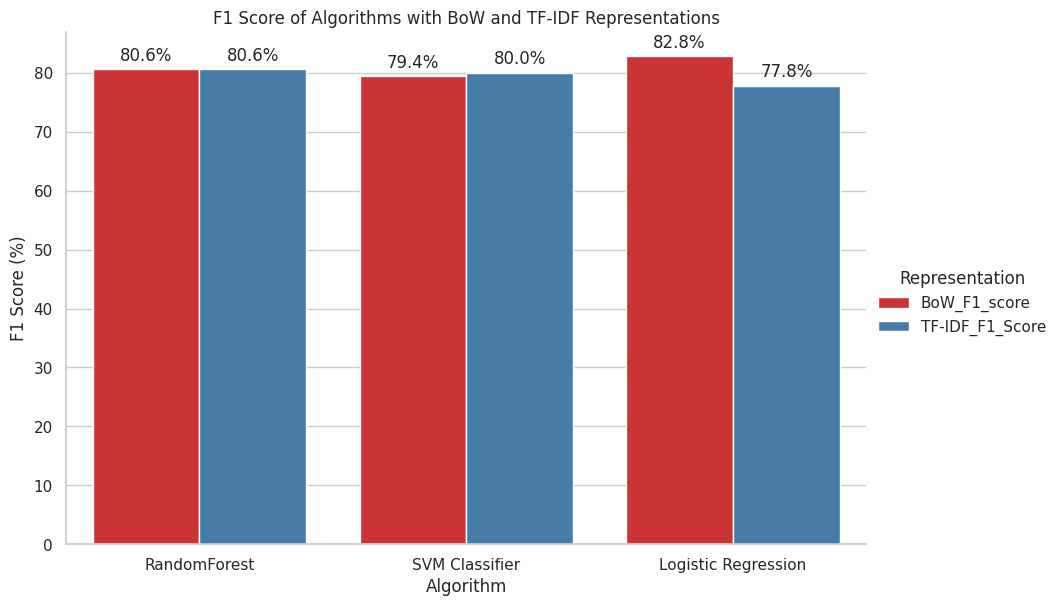

In [ ]:
# Creating a DataFrame with the F1 Score data
f1 = {
    'Algorithm': ['RandomForest', 'SVM Classifier', 'Logistic Regression'],
    'BoW_F1_score': [80.6, 79.4, 82.8],
    'TF-IDF_F1_Score': [80.6, 80.0, 77.8]
}

df = pd.DataFrame(f1)

# Reshape the data for Seaborn
df_melted = df.melt('Algorithm', var_name='Representation', value_name='F1 Score')

# Plotting using Seaborn figure-level function (catplot)
sns.set(style="whitegrid")
g = sns.catplot(x='Algorithm', y='F1 Score', hue='Representation', data=df_melted, kind="bar", palette="Set1", height=6, aspect=1.5)

# Adding labels and title
g.set(title='F1 Score of Algorithms with BoW and TF-IDF Representations', ylabel='F1 Score (%)')

# Annotating each bar with respective percentages
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


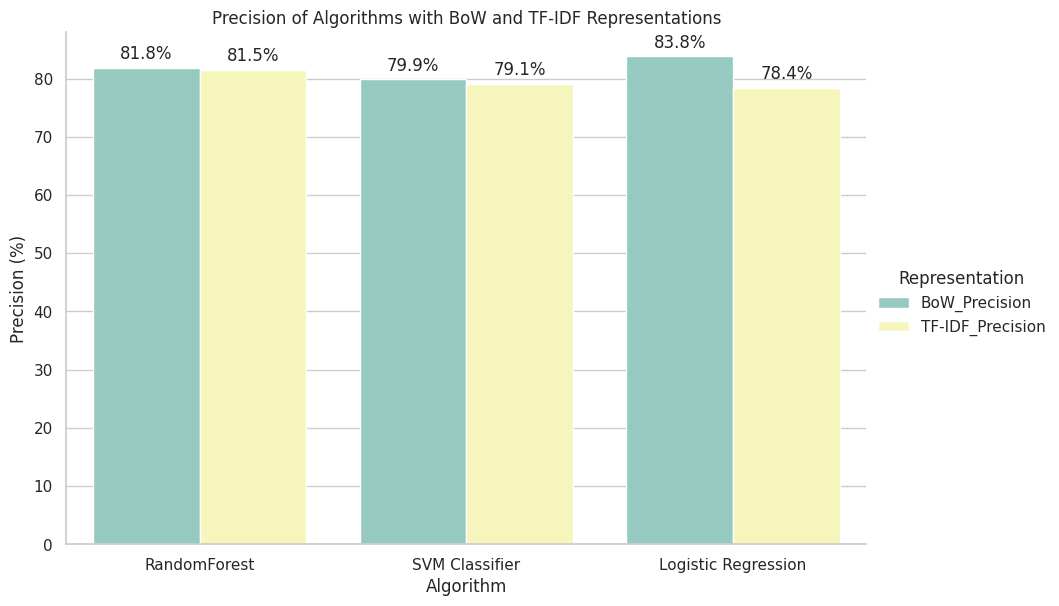

In [ ]:
# Creating a DataFrame with the precision data
pre = {
    'Algorithm': ['RandomForest', 'SVM Classifier', 'Logistic Regression'],
    'BoW_Precision': [81.8, 79.9, 83.8],
    'TF-IDF_Precision': [81.5, 79.1, 78.4]
}

df = pd.DataFrame(pre)

# Reshape the data for Seaborn
df_melted = df.melt('Algorithm', var_name='Representation', value_name='Precision')

# Plotting using Seaborn figure-level function (catplot)
sns.set(style="whitegrid")
g = sns.catplot(x='Algorithm', y='Precision', hue='Representation', data=df_melted, kind="bar", palette="Set3", height=6, aspect=1.5)

# Adding labels and title
g.set(title='Precision of Algorithms with BoW and TF-IDF Representations', ylabel='Precision (%)')

# Annotating each bar with respective percentages
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

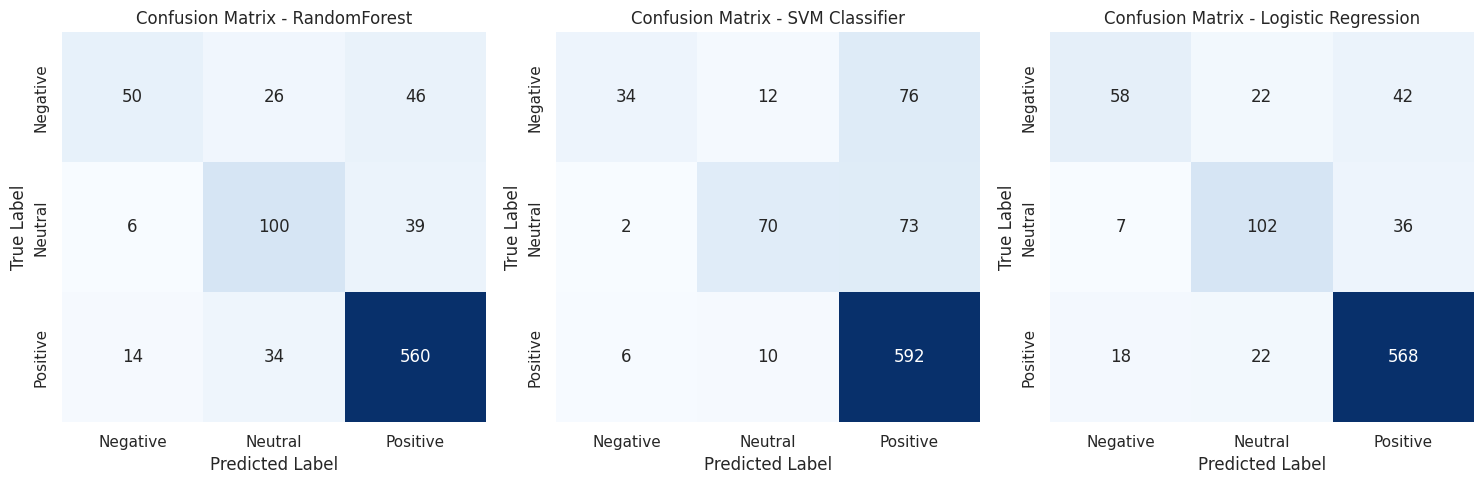

In [ ]:
# Confusion matrices for different algorithms with BoW
confusion_matrices = {
    'RandomForest': np.array([[50, 26, 46], [6, 100, 39], [14, 34, 560]]),
    'SVM Classifier': np.array([[34, 12, 76], [2, 70, 73], [6, 10, 592]]),
    'Logistic Regression': np.array([[58, 22, 42], [7, 102, 36], [18, 22, 568]])
}

# Define class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Plotting confusion matrices
plt.figure(figsize=(15, 5))
for i, (algo, matrix) in enumerate(confusion_matrices.items(), start=1):
    plt.subplot(1, 3, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {algo}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()


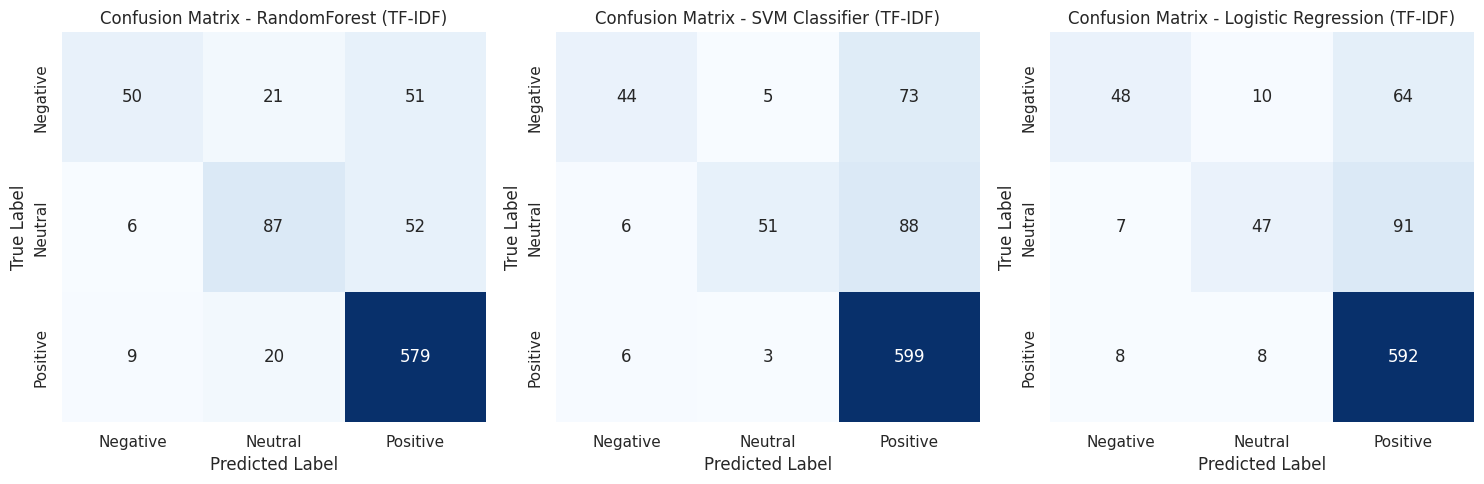

In [ ]:
# Confusion matrices for different algorithms with TF-IDF
confusion_matrices_tfidf = {
    'RandomForest': np.array([[50, 21, 51], [6, 87, 52], [9, 20, 579]]),
    'SVM Classifier': np.array([[44, 5, 73], [6, 51, 88], [6, 3, 599]]),
    'Logistic Regression': np.array([[48, 10, 64], [7, 47, 91], [8, 8, 592]])
}

# Define class labels
class_labels = ['Negative', 'Neutral', 'Positive']

# Plotting confusion matrices for TF-IDF
plt.figure(figsize=(15, 5))
for i, (algo, matrix) in enumerate(confusion_matrices_tfidf.items(), start=1):
    plt.subplot(1, 3, i)
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(f'Confusion Matrix - {algo} (TF-IDF)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()


# Testing with custom input

In [ ]:
# inp = input('Enter : ')
# print(inp)

inp = "compliments are better without emojis"

In [ ]:
custom_input = {'Text': [inp]}
input_df = pd.DataFrame(custom_input)
input_df

,Text
0,compliments are better without emojis


In [ ]:
input_df['Text']

0    compliments are better without emojis
Name: Text, dtype: object

## Text Preprocessing


In [ ]:
# Remove tags
# lowercase
# remove URLs
# remove punctuation
# convert emojis to text
# chat-word treatment
# remove stopwords
# Tokenization
# Lemmatizer

### Removing HTML tags

In [ ]:
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

input_df['Text'] = input_df['Text'].apply(remove_tags)
input_df

,Text
0,compliments are better without emojis


### Lowercase

In [ ]:
input_df['Text'] = input_df['Text'].apply(lambda x:x.lower())
input_df

,Text
0,compliments are better without emojis


### Remove URLs

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

input_df['Text'] = input_df['Text'].apply(remove_url)
input_df

,Text
0,compliments are better without emojis


### Remove Punctuation

In [ ]:
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

input_df['Text'] = input_df['Text'].apply(remove_punc)
input_df

,Text
0,compliments are better without emojis


### Fteching Emojis

In [ ]:
demoji.download_codes()

<ipython-input-60-b6fe2259445e>:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
emojis = input_df['Text'].apply(demoji.findall)
emoji_list = list(emojis.to_list()[0].keys())
emoji_list

[]

### Emojis to text

In [ ]:
def convert_emojis_to_shortcodes(text):
    return emoji.demojize(text, delimiters=(" ", " "))

input_df['Text'] = input_df['Text'].apply(convert_emojis_to_shortcodes)
input_df

,Text
0,compliments are better without emojis


### Remove underscores from emoji text

In [ ]:
input_df['Text'] = input_df['Text'].str.replace('_', ' ')
input_df

,Text
0,compliments are better without emojis


### Chat-Word treatment

In [ ]:
chat_words = {
    "afaik": "as far as i know",
    "afk": "away from keyboard",
    "asap": "as soon as possible",
    "atk": "at the keyboard",
    "atm": "at the moment",
    "a3": "anytime, anywhere, anyplace",
    "bak": "back at keyboard",
    "bbl": "be back later",
    "bbs": "be back soon",
    "bfn": "bye for now",
    "b4n": "bye for now",
    "brb": "be right back",
    "brt": "be right there",
    "btw": "by the way",
    "b4": "before",
    "cu": "see you",
    "cul8r": "see you later",
    "cya": "see you",
    "faq": "frequently asked questions",
    "fc": "fingers crossed",
    "fwiw": "for what it's worth",
    "fyi": "for your information",
    "gal": "get a life",
    "gg": "good game",
    "gn": "good night",
    "gmta": "great minds think alike",
    "gr8": "great!",
    "g9": "genius",
    "ic": "i see",
    "icq": "i seek you (also a chat program)",
    "ilu": "ilu: i love you",
    "imho": "in my honest/humble opinion",
    "imo": "in my opinion",
    "iow": "in other words",
    "irl": "in real life",
    "kiss": "keep it simple, stupid",
    "ldr": "long distance relationship",
    "lmao": "laughing my a** off",
    "lol": "laughing out loud",
    "ltns": "long time no see",
    "l8r": "later",
    "mte": "my thoughts exactly",
    "m8": "mate",
    "nrn": "no reply necessary",
    "oic": "oh i see",
    "pita": "pain in the a..",
    "prt": "party",
    "prw": "parents are watching",
    "qpsa": "que pasa?",
    "rofl": "rolling on the floor laughing",
    "roflol": "rolling on the floor laughing out loud",
    "rotflmao": "rolling on the floor laughing my a.. off",
    "sk8": "skate",
    "stats": "your sex and age",
    "asl": "age, sex, location",
    "thx": "thank you",
    "ttfn": "ta-ta for now!",
    "ttyl": "talk to you later",
    "u": "you",
    "u2": "you too",
    "u4e": "yours for ever",
    "wb": "welcome back",
    "wtf": "what the f...",
    "wtg": "way to go!",
    "wuf": "where are you from?",
    "w8": "wait...",
    "7k": "sick:-d laugher",
    "tfw": "that feeling when",
    "mfw": "my face when",
    "mrw": "my reaction when",
    "ifyp": "i feel your pain",
    "tntl": "trying not to laugh",
    "jk": "just kidding",
    "idc": "i don’t care",
    "ily": "i love you",
    "imu": "i miss you",
    "adih": "another day in hell",
    "zzz": "sleeping, bored, tired",
    "wywh": "wish you were here",
    "time": "tears in my eyes",
    "bae": "before anyone else",
    "fimh": "forever in my heart",
    "bsaaw": "big smile and a wink",
    "bwl": "bursting with laughter",
    "bff": "best friends forever",
    "csl": "can’t stop laughing",
}

In [ ]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w in chat_words:
            new_text.append(chat_words[w])
        else:
            new_text.append(w)
    return " ".join(new_text)

input_df['Text'] = input_df['Text'].apply(chat_conversion)
input_df

,Text
0,compliments are better without emojis


### Remove Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sw_list = stopwords.words('english')

In [ ]:
input_df['Text'] = input_df['Text'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))
input_df

,Text
0,compliments better without emojis


### Tokenization

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

input_df['Text'] = input_df['Text'].apply(tokenize_text)
input_df

,Text
0,"[compliments, better, without, emojis]"


### Stemming

In [ ]:
stemmer = PorterStemmer()

In [ ]:
def stem_tokens(tok):
    stemmed_tokens = [stemmer.stem(t) for t in tok]
    return " ".join(stemmed_tokens)

# Apply the stemming function to the 'tokens' column
input_df['Text'] = input_df['Text'].apply(stem_tokens)
input_df

,Text
0,compliment better without emoji


## Prediction

In [ ]:
def show_output(emoji_list, prediction_output):
    # Negative -> 0
    # Neutral -> 1
    # Positive -> 2

    output = None

    if prediction_output[0] == 0:
        output = 'Negative'
    elif prediction_output[0] == 1:
        output = 'Neutral'
    elif prediction_output[0] == 2:
        output = 'Positive'

    if len(emoji_list) == 0:
        print('The overall sentiment is: ', output)
    else:
        print('Emojis found:', emoji_list, 'The overall sentiment is:', output)


In [ ]:
x_custom_tfidf = tfidf.transform(input_df['Text']).toarray()

In [ ]:
x_custom_bow = cv.transform(input_df['Text']).toarray()
x_custom_bow

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Using Logistic Regression

prediction = logreg_classifier.predict(x_custom_bow)
show_output(emoji_list, prediction)

The overall sentiment is:  Positive


In [ ]:
# Using SVM classifier

prediction = svm_classifier.predict(x_custom_bow)
show_output(emoji_list, prediction)

The overall sentiment is:  Positive


In [ ]:
# Using RandomForest

prediction = rf.predict(x_custom_bow)
show_output(emoji_list, prediction)

The overall sentiment is:  Positive


# Conclusion